## Discente: Tamires Wedekim de Toledo

##DataSet [Cervical Cancer (Risk Factors)](https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors)

Fonte de dados: UCI Machine Learning Repository
[Artigo publicado](https://peerj.com/articles/cs-154/).

Eu não tenho uma base dados de pesquisa, dessa forma utilizei o dataset acima, estou tentando conseguir uma base dados que seja mais interessante para mim. Quero trabalhar com a base do SISCOLO do Município de São Paulo, consegui caminhar no acesso a base recente, porém sigo sem um dicionário de dados. Caso eu consiga o dicionário, irei mudar o estudo.

Este o dataset desta análise por proximidade com o tema do meu interesse. O dataset centra-se na previsão de indicadores/diagnóstico de câncer do colo do útero. As variáveis apresentam informações demográficas, hábitos e registros médicos históricos de 858 pacientes. Vários pacientes decidiram não responder a algumas perguntas por questões de privacidade (valores faltantes). O dataset já veio com o tratamento das variáveis categóricas transformadas em variáveis dummy.

A base de dados vem dividido em dois datasets, sendo o critério da divisão as variáveis preditoras e alvos, eu fiz a junção da base para trabalhar o dados.

Optei por trabalhar como variável alvo somente a variável 'Biopsy', que trata-se da biopsia do colo do útero.

Segue abaixo o dicionário de Variáveis:

| Variável  | Tradução | Descrição |
|-----------|-----|-----------|
|Age | Idade | |
| Number of sexual partners | Número de parceiros sexuais | |
| First sexual intercourse (age) | Primeira relação sexual (idade) | |
| Num of pregnancies | Número de gestações | |
| Smokes | Fuma | |
| Smokes (years) | Fuma (anos) | |
| Smokes (packs/year) | Fuma (pacotes/ano) | |
| Hormonal Contraceptives | Contraceptivo hormonal | |
| Hormonal Contraceptives (years) | Contraceptivo hormonal (anos) | |
| IUD | DIU | |
| IUD (years) | DIU (anos) | |
| STDs | IST | Infecções sexualmente transmissíveis |
| STDs (number) | IST (número) | |
| STDs:condylomatosis | IST: Condiloma | Verruga genital |
| STDs:cervical condylomatosis | IST: Condiloma cervical | lesão no colo do útero |
| STDs:vaginal condylomatosis | IST: Condiloma vaginal | Verruga vaginal |
| STDs:vulvo-perineal condylomatosis | IST: Condiloma vulvo-perineal | verruga na região genital e no ânus|
| STDs:syphilis | IST: sífilis | |
| STDs:pelvic inflammatory disease | IST:  Doença inflamatória pélvica (DIP) | infecção dos órgãos reprodutores femininos superiores |
|STDs:genital herpes | IST: Herpes genital | |
| STDs:molluscum contagiosum | IST: Molusco contagioso | |
| STDs:AIDS | IST: AIDS | Pessoal vivendo com HIV |
| STDs:HIV | IST: HIV | O vírus |
| STDs:Hepatitis B | IST: Hepatite B | |
| STDs:HPV | IST: HPV | |
| STDs: Number of diagnosis | IST: Número de diagnósticos | |
| STDs: Time since first diagnosis | IST: Tempo desde o primeiro diagnóstico | |
| STDs: Time since last diagnosis | IST: Tempo desde o último diagnóstico | |
| Dx:Cancer | Diagnóstico: Câncer| CID-10 C53 Neoplasia maligna do colo do útero |
| Dx:CIN | Diagnóstico NIC | Displasia cervical - NIC 1, NIC 2, NIC 3 -  base de dados trata como dummy |
| Dx:HPV | Diagnóstico HPV | |
| Dx | Diagnóstico | |
| Hinselmann: target variable | Colposcopia | |
| Schiller: target variable | Teste de Schiller | Iodo na colposcopia |
| Cytology: target variable | Citologia cervical | Papanicolau |
| Biopsy: target variable | Biopsia do colo do útero | |

In [ ]:
# instalando a base dados ucimlrepo
!pip install ucimlrepo

In [ ]:
# importando a biblioteca pandas
import pandas as pd

#importanto biblioteca seaborn
import seaborn as sns

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# importando a biblioteca numpy
import numpy as np

In [ ]:
# importando a função fetch_ucirepo da biblioteca ucimlrepo
from ucimlrepo import fetch_ucirepo

#  baixando o dataset com o ID 383
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# juntando as variáveis preditoras e a alvo em um único df (sem separar preditoras e alvo)
# concatenação ocorre horizontalmente (axis=1)
df = pd.concat([cervical_cancer_risk_factors.data.features, cervical_cancer_risk_factors.data.targets], axis=1)

# vizualizar o df
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# quantidade de linhas e colunas
df.shape

(858, 36)

In [ ]:
# informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Não há variáveis categóricas.

In [ ]:
# verificando valores ausentes para cada coluna
df.isna().sum()

,0
Age,0
Number of sexual partners,26
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
IUD,117


In [ ]:
# Descrição estatística das variáveis ivertendo linhas e colunas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


Há variáveis que não estão padronizadas (média ≠ de 0)

In [ ]:
#Contagem de itens na coluna Age
#Dados ausentes = 0
df['Age'].value_counts(dropna=False)

,count
Age,
23,54
18,50
21,46
20,45
19,44
24,39
25,39
26,38
28,37


In [ ]:
#Contagem de itens na coluna Number of sexual partners
#Dados ausentes = 26
df['Number of sexual partners'].value_counts(dropna=False)

,count
Number of sexual partners,
2.0,272
3.0,208
1.0,206
4.0,78
5.0,44
NaN,26
6.0,9
7.0,7
8.0,4


In [ ]:
#Contagem de itens na coluna Age
#Dados ausentes = 7
df['First sexual intercourse'].value_counts(dropna=False)

,count
First sexual intercourse,
15.0,163
17.0,151
18.0,137
16.0,121
14.0,79
19.0,60
20.0,37
13.0,25
21.0,20


In [ ]:
#Contagem de itens na coluna Num of pregnancies
#Dados ausentes = 56
df['Num of pregnancies'].value_counts(dropna=False)

,count
Num of pregnancies,
1.0,270
2.0,240
3.0,139
4.0,74
NaN,56
5.0,35
6.0,18
0.0,16
7.0,6


In [ ]:
#Contagem de itens na coluna Smokes
#Dados ausentes = 13
df['Smokes'].value_counts(dropna=False)

,count
Smokes,
0.0,722
1.0,123
NaN,13


In [ ]:
#Contagem de itens na coluna Smokes (years)
#Dados ausentes = 13
df['Smokes (years)'].value_counts(dropna=False)

,count
Smokes (years),
0.000000,722
1.266973,15
NaN,13
5.000000,9
9.000000,9
1.000000,8
3.000000,7
2.000000,7
16.000000,6


In [ ]:
#Contagem de itens na coluna Smokes (packs/year)
#Dados ausentes = 13
df['Smokes (packs/year)'].value_counts(dropna=False)

,count
Smokes (packs/year),
0.000000,722
0.513202,18
NaN,13
1.000000,6
3.000000,5
...,...
37.000000,1
1.250000,1
2.250000,1


In [ ]:
#Contagem de itens na coluna Hormonal Contraceptives
#Dados ausentes = 108
df['Hormonal Contraceptives'].value_counts(dropna=False)

,count
Hormonal Contraceptives,
1.0,481
0.0,269
NaN,108


In [ ]:
#Contagem de itens na coluna Hormonal Contraceptives (years)
#Dados ausentes = 108
df['Hormonal Contraceptives (years)'].value_counts(dropna=False)

,count
Hormonal Contraceptives (years),
0.000000,269
NaN,108
1.000000,77
0.250000,41
2.000000,40
3.000000,39
5.000000,34
0.080000,25
0.500000,25


In [ ]:
#Contagem de itens na coluna IUD (DIU)
#Dados ausentes = 117
df['IUD'].value_counts(dropna=False)

,count
IUD,
0.0,658
NaN,117
1.0,83


In [ ]:
#Contagem de itens na coluna IUD (years)
#Dados ausentes = 117
df['IUD (years)'].value_counts(dropna=False)

,count
IUD (years),
0.00,658
NaN,117
3.00,11
2.00,10
5.00,9
1.00,8
8.00,7
7.00,7
4.00,5


In [ ]:
#Contagem de itens na coluna STDs
#Dados ausentes = 105
df['STDs'].value_counts(dropna=False)

,count
STDs,
0.0,674
NaN,105
1.0,79


In [ ]:
#Contagem de itens na coluna STDs (number)
#Dados ausentes = 105
df['STDs (number)'].value_counts(dropna=False)

,count
STDs (number),
0.0,674
NaN,105
2.0,37
1.0,34
3.0,7
4.0,1


In [ ]:
#Contagem de itens na coluna STDs:condylomatosis
#Dados ausentes = 105
df['STDs:condylomatosis'].value_counts(dropna=False)

,count
STDs:condylomatosis,
0.0,709
NaN,105
1.0,44


In [ ]:
#Contagem de itens na coluna STDs:cervical condylomatosis
#Dados ausentes = 105
df['STDs:cervical condylomatosis'].value_counts(dropna=False)

,count
STDs:cervical condylomatosis,
0.0,753
NaN,105


In [ ]:
#Contagem de itens na coluna STDs:vaginal condylomatosis
#Dados ausentes = 105
df['STDs:vaginal condylomatosis'].value_counts(dropna=False)

,count
STDs:vaginal condylomatosis,
0.0,749
NaN,105
1.0,4


In [ ]:
#Contagem de itens na coluna STDs:vulvo-perineal condylomatosis
#Dados ausentes = 105
df['STDs:vulvo-perineal condylomatosis'].value_counts(dropna=False)

,count
STDs:vulvo-perineal condylomatosis,
0.0,710
NaN,105
1.0,43


In [ ]:
#Contagem de itens na coluna STDs:syphilis
#Dados ausentes = 105
df['STDs:syphilis'].value_counts(dropna=False)

,count
STDs:syphilis,
0.0,735
NaN,105
1.0,18


In [ ]:
#Contagem de itens na coluna STDs:pelvic inflammatory disease
#Dados ausentes = 105
df['STDs:pelvic inflammatory disease'].value_counts(dropna=False)

,count
STDs:pelvic inflammatory disease,
0.0,752
NaN,105
1.0,1


In [ ]:
#Contagem de itens na coluna STDs:genital herpes
#Dados ausentes = 105
df['STDs:genital herpes'].value_counts(dropna=False)

,count
STDs:genital herpes,
0.0,752
NaN,105
1.0,1


In [ ]:
#Contagem de itens na coluna STDs:molluscum contagiosum
#Dados ausentes = 105
df['STDs:molluscum contagiosum'].value_counts(dropna=False)

,count
STDs:molluscum contagiosum,
0.0,752
NaN,105
1.0,1


In [ ]:
#Contagem de itens na coluna STDs:AIDS
#Dados ausentes = 105
df['STDs:AIDS'].value_counts(dropna=False)

,count
STDs:AIDS,
0.0,753
NaN,105


In [ ]:
#Contagem de itens na coluna STDs:HIV
#Dados ausentes = 105
df['STDs:HIV'].value_counts(dropna=False)

,count
STDs:HIV,
0.0,735
NaN,105
1.0,18


In [ ]:
#Contagem de itens na coluna STDs:Hepatitis B
#Dados ausentes = 105
df['STDs:Hepatitis B'].value_counts(dropna=False)

,count
STDs:Hepatitis B,
0.0,752
NaN,105
1.0,1


In [ ]:
#Contagem de itens na coluna STDs:HPV
#Dados ausentes = 105
df['STDs:HPV'].value_counts(dropna=False)

,count
STDs:HPV,
0.0,751
NaN,105
1.0,2


In [ ]:
#Contagem de itens na coluna STDs: Number of diagnosis
#Não há dados ausentes
df['STDs: Number of diagnosis'].value_counts(dropna=True)

,count
STDs: Number of diagnosis,
0,787
1,68
2,2
3,1


In [ ]:
#Contagem de itens na coluna STDs: Time since first diagnosis
#Dados ausentes = 787
df['STDs: Time since first diagnosis'].value_counts(dropna=False)

,count
STDs: Time since first diagnosis,
NaN,787
1.0,15
3.0,10
2.0,9
4.0,6
7.0,5
16.0,4
5.0,4
8.0,3


In [ ]:
#Contagem de itens na coluna STDs: Time since last diagnosis
#Dados ausentes = 787
df['STDs: Time since last diagnosis'].value_counts(dropna=False)

,count
STDs: Time since last diagnosis,
NaN,787
1.0,17
2.0,10
3.0,9
4.0,6
7.0,5
16.0,4
5.0,3
8.0,3


In [ ]:
#Contagem de itens na coluna Dx:Cancer
#Dados ausentes = 0
df['Dx:Cancer'].value_counts(dropna=False)

,count
Dx:Cancer,
0,840
1,18


In [ ]:
#Contagem de itens na coluna Dx:CIN
#Dados ausentes = 0
df['Dx:CIN'].value_counts(dropna=False)

,count
Dx:CIN,
0,849
1,9


In [ ]:
#Contagem de itens na coluna Dx:HPV
#Dados ausentes = 0
df['Dx:HPV'].value_counts(dropna=False)

,count
Dx:HPV,
0,840
1,18


In [ ]:
#Contagem de itens na coluna Dx
#Dados ausentes = 0
df['Dx'].value_counts(dropna=False)

,count
Dx,
0,834
1,24


In [ ]:
#Contagem de itens na coluna Hinselmann (colposcopia)
#Dados ausentes = 0
df['Hinselmann'].value_counts(dropna=False)

,count
Hinselmann,
0,823
1,35


In [ ]:
#Contagem de itens na coluna Schiller (teste iodo)
#Dados ausentes = 0
df['Schiller'].value_counts(dropna=False)

,count
Schiller,
0,784
1,74


In [ ]:
#Contagem de itens na coluna Citology (papanicolau)
#Dados ausentes = 0
df['Citology'].value_counts(dropna=False)

,count
Citology,
0,814
1,44


In [ ]:
#Contagem de itens na coluna Biopsy
#Dados ausentes = 0
df['Biopsy'].value_counts(dropna=False)

,count
Biopsy,
0,803
1,55


In [ ]:
# Verificar se os NaNs na coluna 'Time since first diagnosis' coincidem com valores 0 em 'STDs: Number of diagnosis'
result = (df['STDs: Number of diagnosis'] == 0) & (df['STDs: Time since first diagnosis'].isna())

# Contar quantos valores atendem a essa condição
matching_rows = result.sum()

print(f"Número de linhas que correspondem à condição: {matching_rows}")

Número de linhas que correspondem à condição: 787


In [ ]:
# Preencher os valores nulos (NaN) com 0 na coluna 'STDs: Time since first diagnosis'
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(0)

In [ ]:
#Contagem de itens na coluna STDs: Time since first diagnosis
#Dados ausentes transformados em 0
df['STDs: Time since first diagnosis'].value_counts(dropna=False)

,count
STDs: Time since first diagnosis,
0.0,787
1.0,15
3.0,10
2.0,9
4.0,6
7.0,5
16.0,4
5.0,4
8.0,3


### Variáveis Dummy de Infecções sexualmente transmissíveis  que apresentam poucos argumentos serão aglutinadas numa única variável 'STDs: Várias'

| Variável  | Variável Dummy | Quantidade de dados faltantes |
|-----------|----------------|-----------|
| STDs:vaginal condylomatosis | 4 itens = 1 | 105 |
| STDs:pelvic inflammatory disease | 1 item = 1 | 105 |
| STDs:genital herpes | 1 item = 1 | 105 |
| STDs:molluscum contagiosum | 1 item = 1 | 105 |
| STDs:Hepatitis B | 1 item = 1 | 105 |
| STDs:HPV | 2 itens = 1 | 105 |


In [ ]:
# Criar nova variável somando as colunas especificadas acima
df['STDs: Várias'] = df[['STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum',
                        'STDs:Hepatitis B', 'STDs:HPV']].sum(axis=1)

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,STDs: Várias
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,1,0,1,0,0,0,0,0,0.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0


In [ ]:
#Contagem de itens na coluna STDs: Várias
#Dados ausentes = 0
df['STDs: Várias'].value_counts()

,count
STDs: Várias,
0.0,848
1.0,10


### Variáveis que não são boas preditoras serão excluídas do dataset

Após a criação da coluna 'STDs: Várias', serão excluídas variáveis que existem poucos argumentos e foram aglutinas e as que possuem todos os argumentos iguais

| Variável  | Variável Dummy | Quantidade de dados faltantes |
|-----------|----------------|-----------|
| STDs:cervical condylomatosis | Todos itens = 0 | 105 |
| STDs:AIDS | Todos itens = 0 | 105 |
| STDs:vaginal condylomatosis | 4 itens = 1 | 105 |
| STDs:pelvic inflammatory disease | 1 item = 1 | 105 |
| STDs:genital herpes | 1 item = 1 | 105 |
| STDs:molluscum contagiosum | 1 item = 1 | 105 |
| STDs:Hepatitis B | 1 item = 1 | 105 |
| STDs:HPV | 2 itens = 1 | 105 |

In [ ]:
# Criando um novo dataset 'df_new' que traz a exclusão das variáveis apresentadas na tabela acima
df_new = df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS', 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum',
                        'STDs:Hepatitis B', 'STDs:HPV'], axis=1) # comando drop. axis = 1 quando a coluna é retirada pelo nome e
                                                                              # axis = 0 quando se deseja retirar a coluna pelo índice.
df_new.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,STDs: Várias
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,1,0,1,0,0,0,0,0,0.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0.0


In [ ]:
# informações do 'df_new'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
# Descrição estatística das variáveis do 'df_new' ivertendo linhas e colunas
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


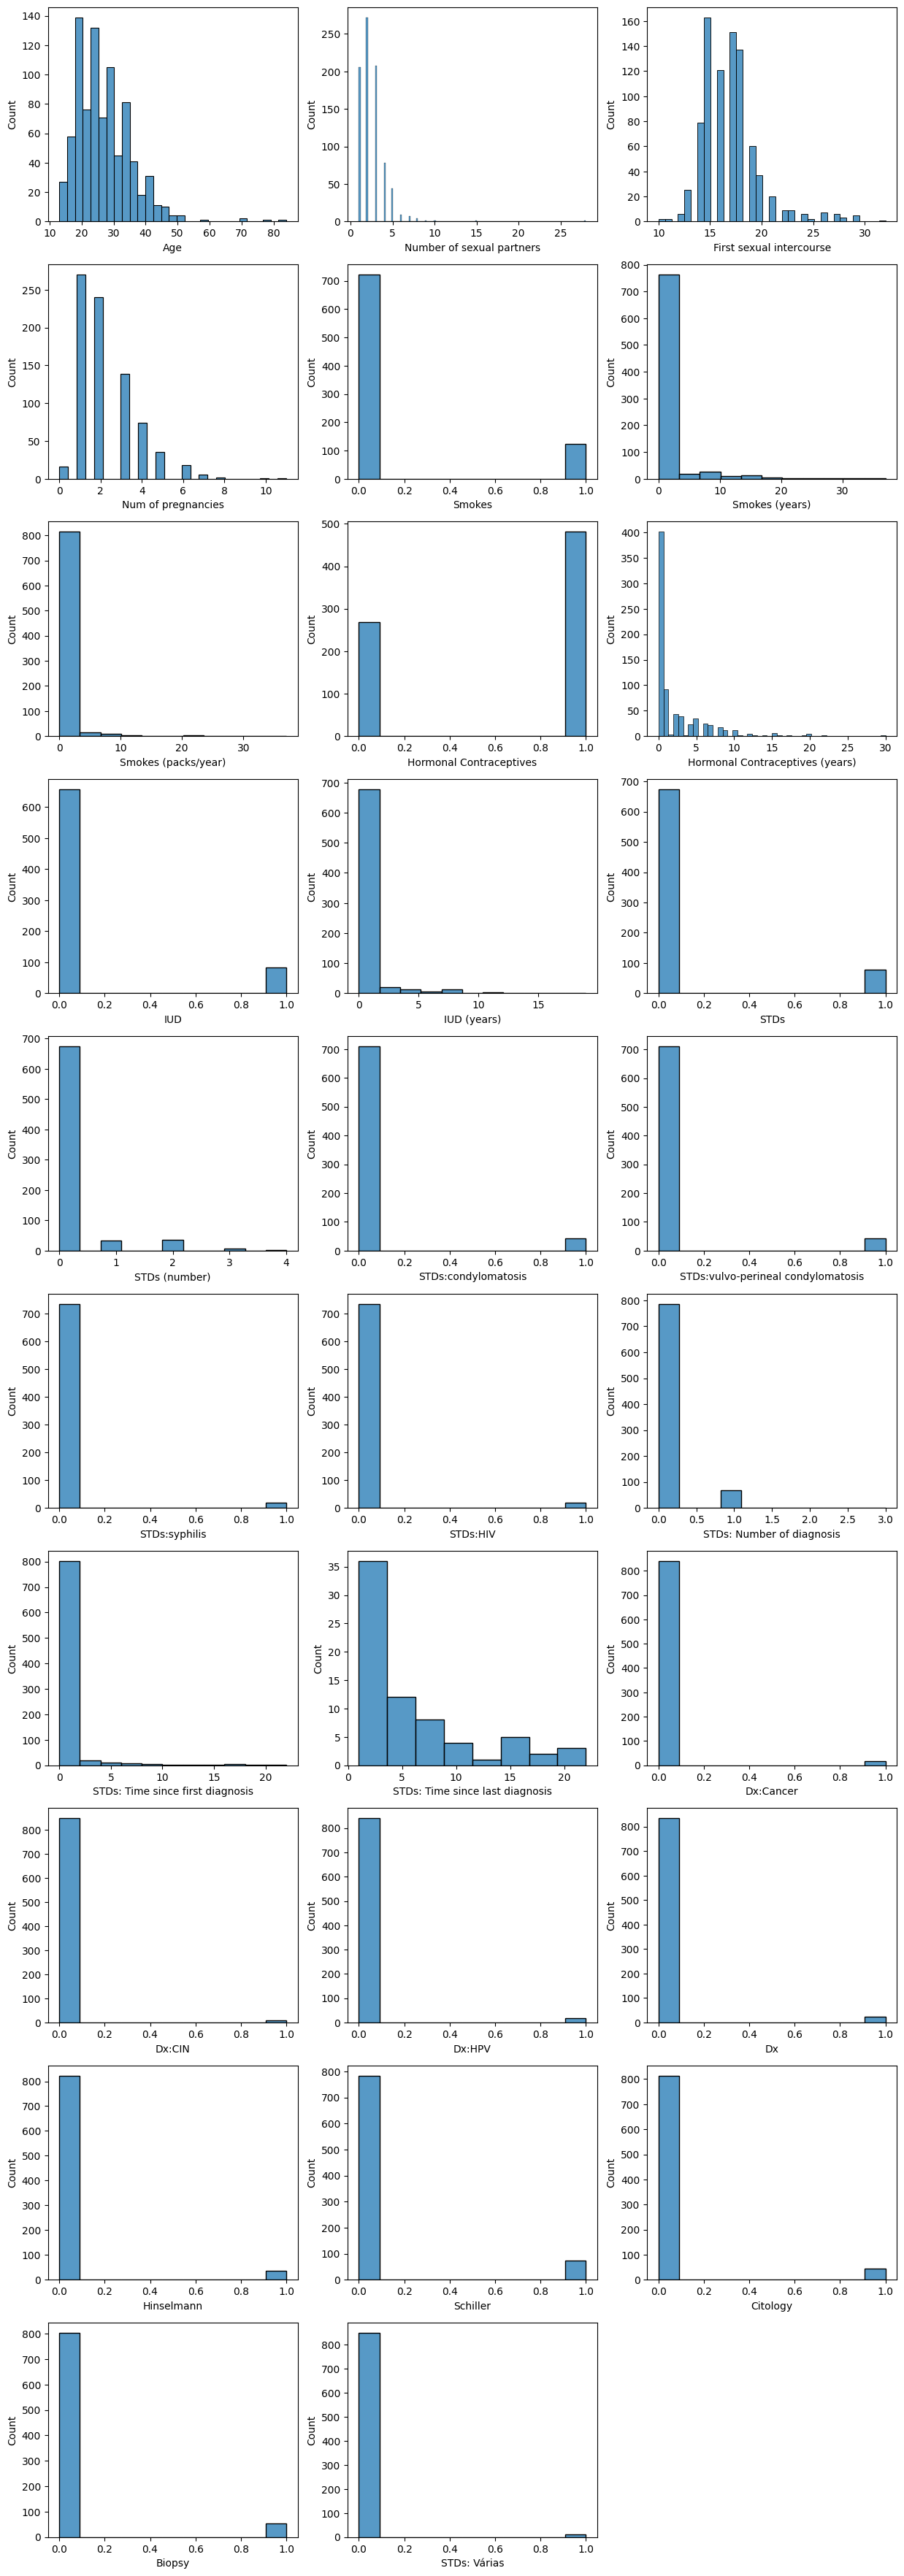

In [ ]:
# Múltiplos histogramas do df_new
to_plot = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
           'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
           'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
           'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
           'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs: Várias']

plt.figure(figsize = (15,45))

for i in enumerate(to_plot):
    plt.subplot(10,3,i[0]+1)
    grafico = sns.histplot(x=i[1],
                data=df_new)
    grafico.set(ylabel="Count")

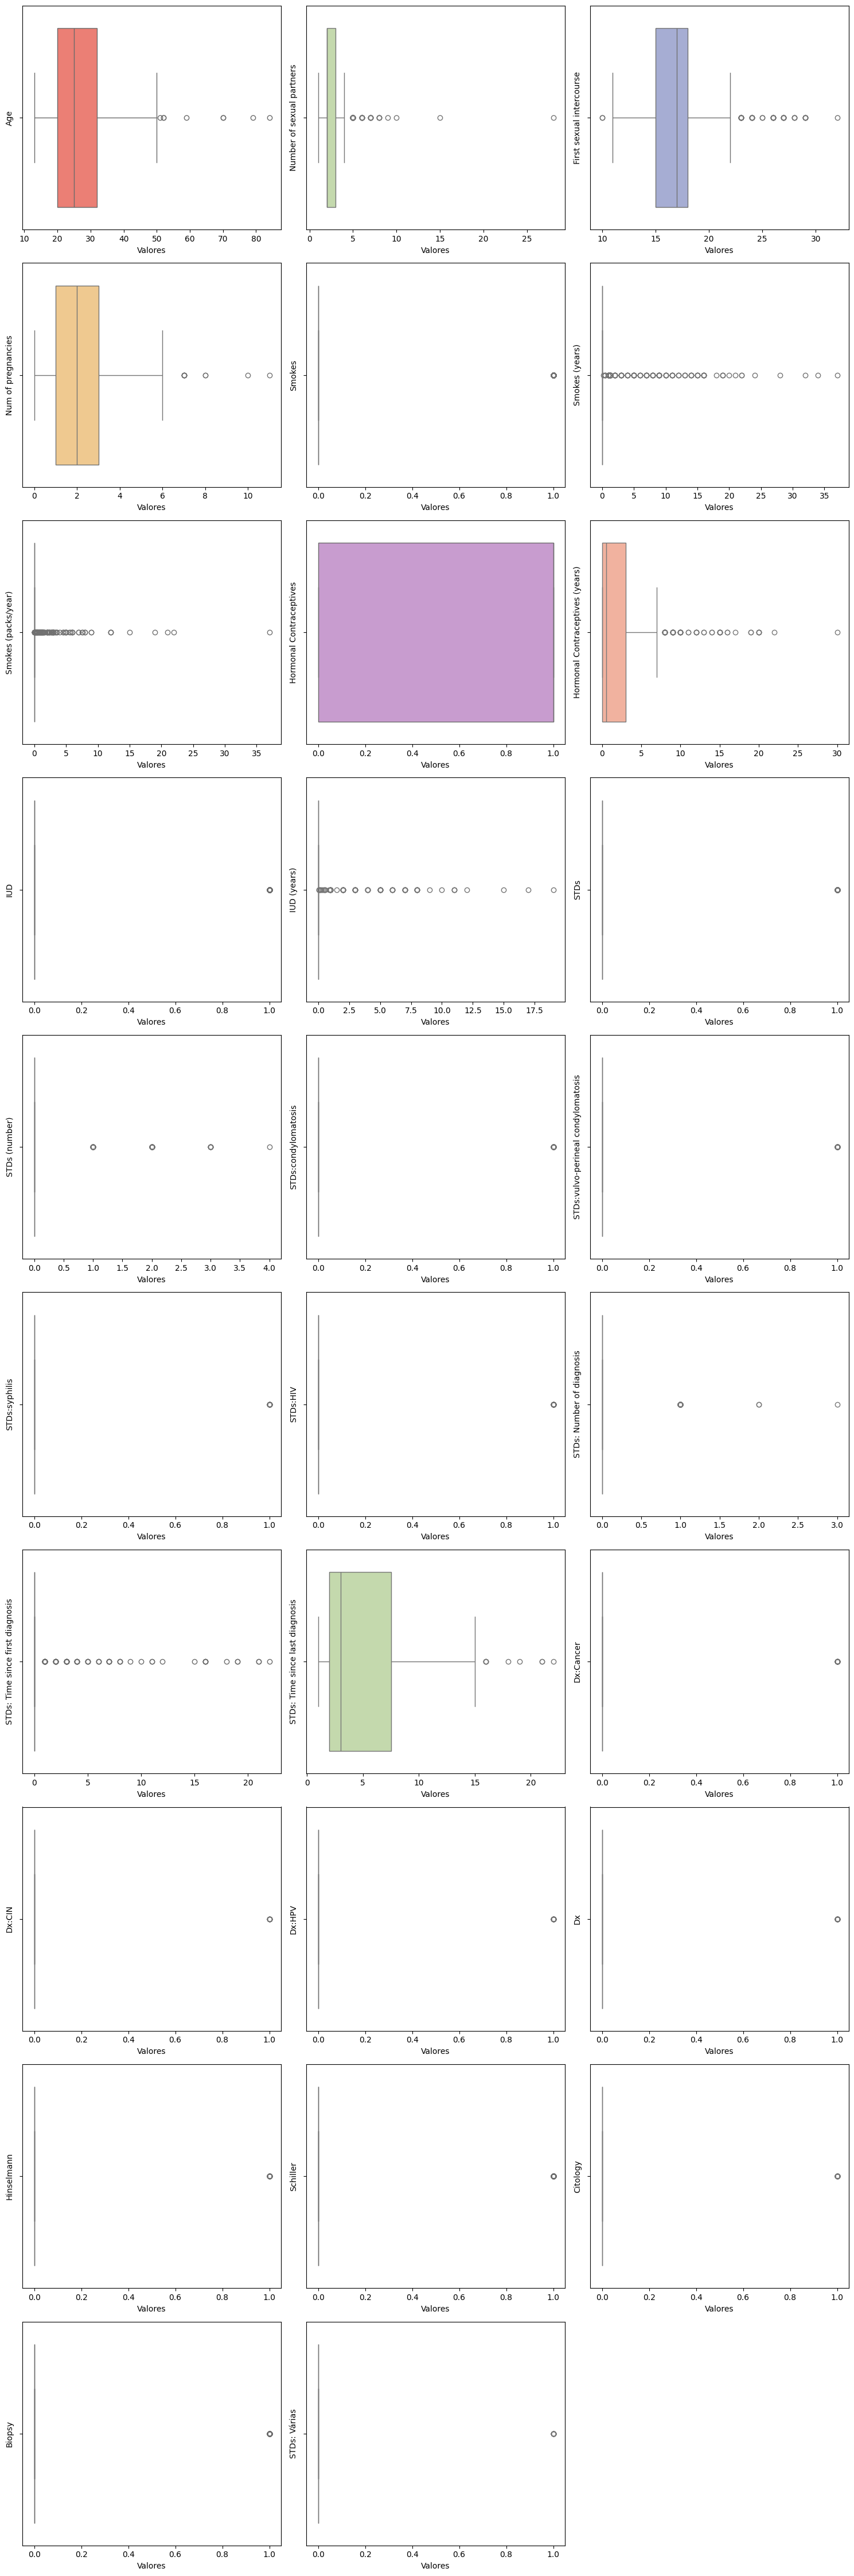

In [ ]:
# Lista das colunas que serão plotadas
to_plot = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
           'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
           'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
           'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
           'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs: Várias']

# Definindo uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5', '#9fa8da', '#ffcc80', '#a5d6a7', '#f48fb1', '#b39ddb', '#ce93d8', '#ffab91']

plt.figure(figsize=(15, 45))

# Loop para criar um boxplot horizontal para cada variável
for i, col in enumerate(to_plot):
    plt.subplot(10, 3, i+1)  # Organiza os gráficos em um grid 10x3
    grafico = sns.boxplot(x=col, data=df_new, orient='h', color=colors[i % len(colors)])  # Aplica cor de forma cíclica
    grafico.set(ylabel=col, xlabel="Valores")

plt.tight_layout()  # Ajusta os gráficos para evitar sobreposição
plt.show()

In [ ]:
correlation_matrix = df_new.corr()

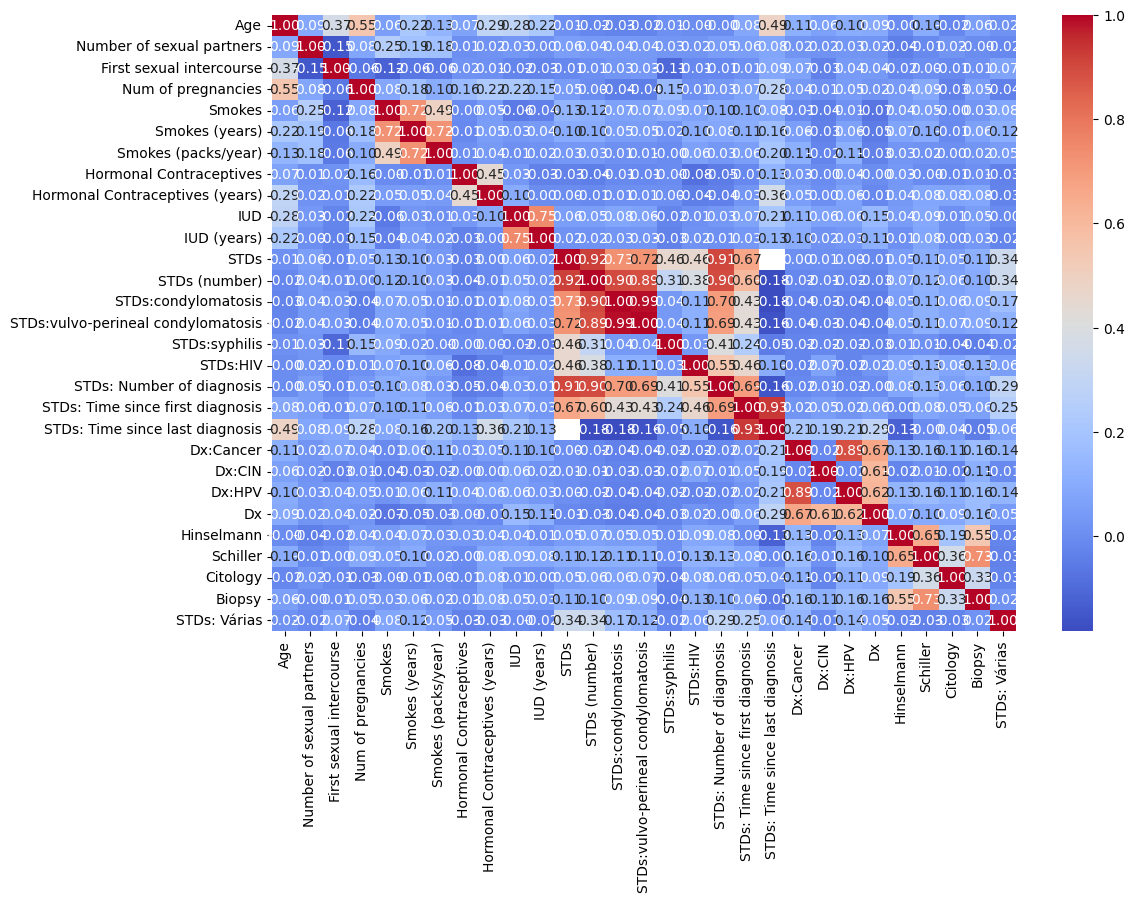

In [ ]:
# Criar um heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Calcular a matriz de correlação apenas para as variáveis com alta colinearidade
corr = df_new[['STDs', 'STDs (number)', 'STDs:condylomatosis',
               'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
               'STDs:HIV', 'STDs: Number of diagnosis',
               'STDs: Time since first diagnosis',
               'STDs: Time since last diagnosis']].corr()

corr

,STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
STDs,1.000000,0.918609,0.727645,0.718822,0.457098,0.457098,0.906662,0.665881,NaN
STDs (number),0.918609,1.000000,0.899521,0.890699,0.306830,0.384231,0.897233,0.602351,-0.179025
STDs:condylomatosis,0.727645,0.899521,1.000000,0.987875,0.035145,0.109276,0.699038,0.431392,-0.182258
STDs:vulvo-perineal condylomatosis,0.718822,0.890699,0.987875,1.000000,0.036422,0.111357,0.690562,0.432870,-0.162766
STDs:syphilis,0.457098,0.306830,0.035145,0.036422,1.000000,0.032426,0.412032,0.241589,-0.049833
STDs:HIV,0.457098,0.384231,0.109276,0.111357,0.032426,1.000000,0.547506,0.464085,0.103655
STDs: Number of diagnosis,0.906662,0.897233,0.699038,0.690562,0.412032,0.547506,1.000000,0.690979,-0.157872
STDs: Time since first diagnosis,0.665881,0.602351,0.431392,0.432870,0.241589,0.464085,0.690979,1.000000,0.930907
STDs: Time since last diagnosis,NaN,-0.179025,-0.182258,-0.162766,-0.049833,0.103655,-0.157872,0.930907,1.000000


###Tratamento de variáveis com alta colinearidade

*   STDs e STDs (number): Correlação de 0.919

*   STDs:condylomatosis e STDs:vulvo-perineal condylomatosis: Correlação de 0.988

*   STDs e STDs: Number of diagnosis: Correlação de 0.907

*   STDs: Time since first diagnosis e STDs: Time since last diagnosis: Correlação de 0.931


Escolhi retirar as variaveis STDs, STDs:vulvo-perineal condylomatosis, STDs: Time since last diagnosis

Motivos:

*   A variável STDs está contida dentro da variável STDs (number), esta última é mais interessante para o estudo devido apresentar dados mais completos de números de IST de cada sujeito do estudo;
*   A variável STDs:vulvo-perineal condylomatosis apresenta 1 argumento a menos do que a STDs:condylomatosis
*   A variável STDs: Time since last diagnosis foi mantida no estudo devido o câncer do colo do útero se formar através de lesões não cancerígenas provocadas por tipos de HPV de alto risco, IST.

Para que o câncer do colo do útero se desenvolva em pessoas com sistemas imunológicos normais, são necessários de 15 a 20 anos. Em pessoas com sistemas imunológicos debilitados – as que estão infectadas pelo vírus HIV e sem tratamento –, o desenvolvimento do câncer pode levar apenas de 5 a 10 anos.
[Fonte:OPAS/OMS](https://https://www.paho.org/pt/topicos/hpv-e-cancer-do-colo-do-utero#:~:text=Para%20que%20o%20c%C3%A2ncer%20do,de%205%20a%2010%20anos.)







As variáveis 'Hinselmann', 'Schiller' e 'Citology' são variáveis Dumny, os argumentos 0 são resultados normais dos exames e os argumentos 1 são resultados alterados. Dessa forma, optei por retirá-las do modelo, por considerar vazamento de dados com a variável desfecho.

In [ ]:
# Retirando do dataset 'df_new' variáveis com alta colinearidade
df_new = df_new.drop(['STDs: Time since last diagnosis', 'STDs', 'STDs:vulvo-perineal condylomatosis', 'Hinselmann', 'Schiller', 'Citology'], axis=1) # comando drop. axis = 1 quando a coluna é retirada pelo nome e
                                                                              # axis = 0 quando se deseja retirar a coluna pelo índice.
df_new.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy,STDs: Várias
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,0.0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,0.0,1,0,1,0,0,0.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,0.0


In [ ]:
#Criando listas para variáveis do tipo dummy e numéricas
#Retirei a variável 'Biopsy' que será a variável alvo
dummy_features = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs:condylomatosis', 'STDs:syphilis', 'STDs:HIV', 'Dx:Cancer',
                  'Dx:CIN', 'Dx:HPV', 'Dx', 'STDs: Várias']

numeric_features = ['Age', 'First sexual intercourse', 'Number of sexual partners', 'Num of pregnancies',
                    'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
                    'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',  'Smokes (years)']

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas
df_new[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD (years),741.0,0.514804,1.943089,0.0,0.0,0.0,0.0,19.0
STDs (number),753.0,0.176627,0.561993,0.0,0.0,0.0,0.0,4.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
STDs: Time since first diagnosis,858.0,0.508159,2.388333,0.0,0.0,0.0,0.0,22.0


In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas
df_new[dummy_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0
STDs:condylomatosis,753.0,0.058433,0.234716,0.0,0.0,0.0,0.0,1.0
STDs:syphilis,753.0,0.023904,0.152853,0.0,0.0,0.0,0.0,1.0
STDs:HIV,753.0,0.023904,0.152853,0.0,0.0,0.0,0.0,1.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0


### Divisão de treino e teste é necessária fazer para X e Y

### x = variáveis preditoras
### y = variável de desfecho

Eu separei em x1 e y1 porque estava com a ideia de fazer um modelo para cada variável alvo que o estudo que liberou a base de dados apresenta, porém em seguida optei por seguir apenas com a variável 'Biopsy'

In [ ]:
# importando a função train_test_split da biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
#Separando x1 de y1 com a variável alvo Biopsy (Biópsia)
x1_df_new = df_new.drop(columns=['Biopsy'])
y1_df_new = df_new[['Biopsy']]

In [ ]:
#verificando a quantidade de variáveis em x1
x1_df_new.shape

(858, 22)

In [ ]:
#verificando a quantidade de variáveis em y1
y1_df_new.shape

(858, 1)

In [ ]:
#modelo com 70% de treino e 30% de teste
# parâmetro random_state para treino e teste ser separado de modo aleatório
# párâmetro stratify para que a divisão seja feita respeitanto a proporção de eventos entre treino e teste (importantíssimo para dados desbalanceados)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_df_new, y1_df_new, test_size=0.3, random_state=42, stratify=y1_df_new)

In [ ]:
#Quantidade de itens em x1 que foram para o treino
x1_train.shape

(600, 22)

In [ ]:
#Quantidade de itens em x1 que foram para o teste
x1_test.shape

(258, 22)

In [ ]:
#Quantidade de itens em y1 que foram para o treino
y1_train.shape

(600, 1)

In [ ]:
#Quantidade de itens em y1 que foram para o teste
y1_test.shape

(258, 1)

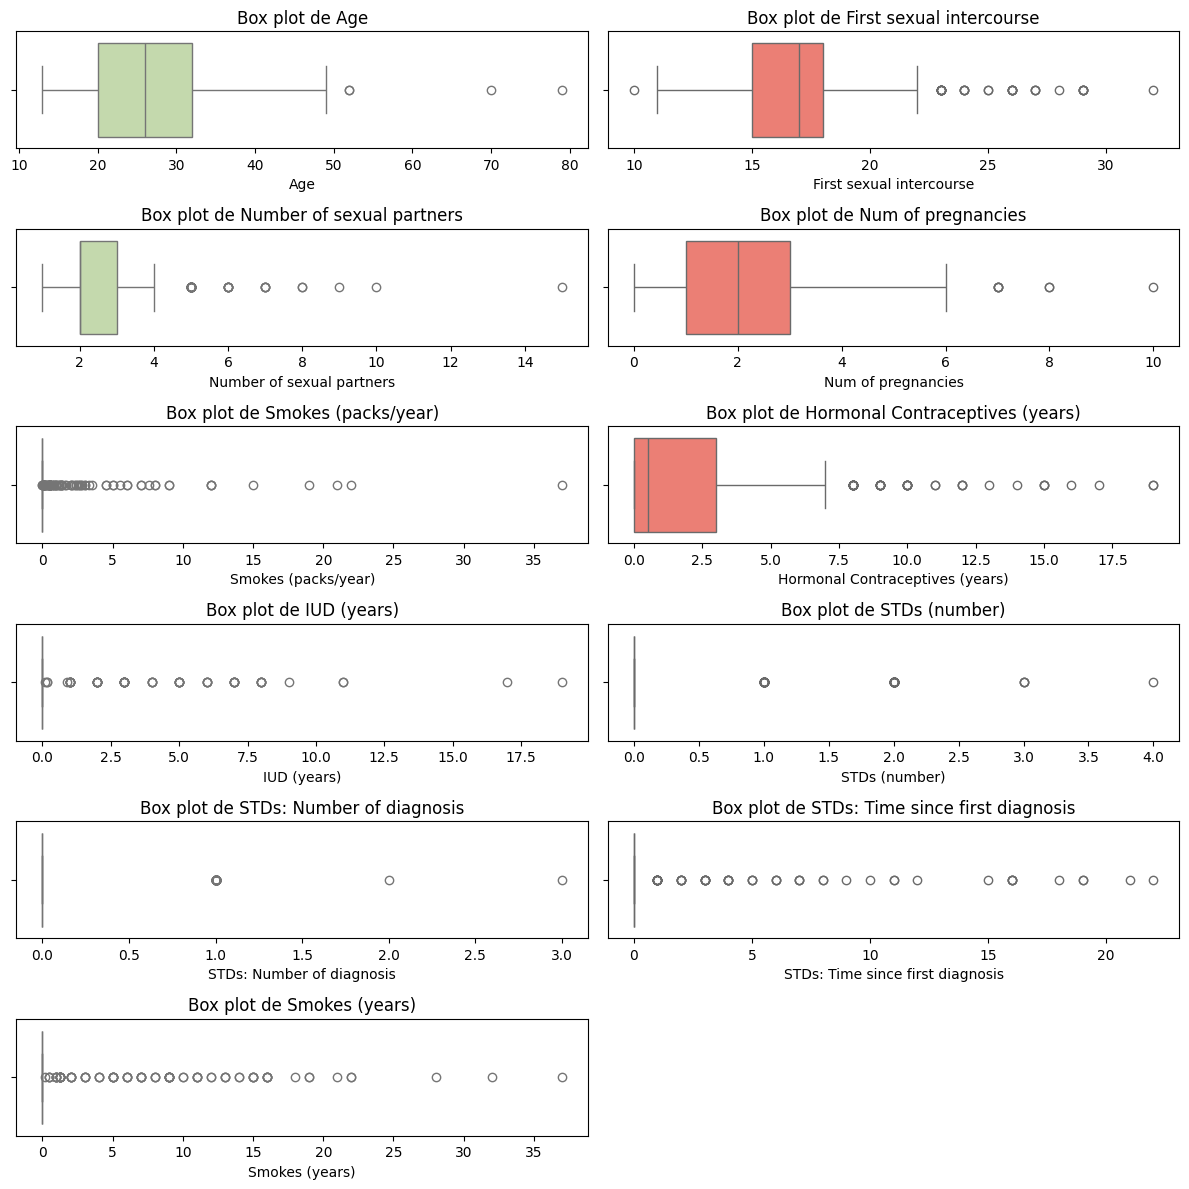

In [ ]:
#Plantando Box Plot para as variáveis numéricas

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_train[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Veriricando a correlação de Pearson (correlação linear) para as variáveis numéricas
#varia de 1 a -1
#0 é quando não há correlação nenhuma
corr = x1_train[numeric_features].corr()
corr

,Age,First sexual intercourse,Number of sexual partners,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,Smokes (years)
Age,1.000000,0.392591,0.107515,0.507523,0.154709,0.277977,0.223258,-0.000062,0.014739,0.090497,0.180145
First sexual intercourse,0.392591,1.000000,-0.089545,-0.101643,-0.056484,0.030382,-0.013457,-0.007352,-0.025421,0.000966,-0.084663
Number of sexual partners,0.107515,-0.089545,1.000000,0.085091,0.163634,0.024370,0.023810,0.093923,0.102911,0.095893,0.194967
Num of pregnancies,0.507523,-0.101643,0.085091,1.000000,0.112334,0.215971,0.131728,0.012118,0.038030,0.071233,0.135667
Smokes (packs/year),0.154709,-0.056484,0.163634,0.112334,1.000000,0.046776,0.020907,0.031205,0.037324,0.055551,0.766396
Hormonal Contraceptives (years),0.277977,0.030382,0.024370,0.215971,0.046776,1.000000,0.020282,0.000168,-0.038387,0.024700,0.088302
IUD (years),0.223258,-0.013457,0.023810,0.131728,0.020907,0.020282,1.000000,0.009877,-0.002765,0.036710,0.026504
STDs (number),-0.000062,-0.007352,0.093923,0.012118,0.031205,0.000168,0.009877,1.000000,0.908493,0.641560,0.129427
STDs: Number of diagnosis,0.014739,-0.025421,0.102911,0.038030,0.037324,-0.038387,-0.002765,0.908493,1.000000,0.707779,0.117557
STDs: Time since first diagnosis,0.090497,0.000966,0.095893,0.071233,0.055551,0.024700,0.036710,0.641560,0.707779,1.000000,0.129756


In [ ]:
#criando uma tabela com as frequências das colunas dummy_features
for feature in dummy_features:
  tab = x1_train[feature].value_counts()
  print(tab)
  print(end='\n') #\n = símbolo de espaço

Smokes
0.0    500
1.0     88
Name: count, dtype: int64

Hormonal Contraceptives
1.0    326
0.0    187
Name: count, dtype: int64

IUD
0.0    449
1.0     59
Name: count, dtype: int64

STDs:condylomatosis
0.0    486
1.0     31
Name: count, dtype: int64

STDs:syphilis
0.0    503
1.0     14
Name: count, dtype: int64

STDs:HIV
0.0    502
1.0     15
Name: count, dtype: int64

Dx:Cancer
0    584
1     16
Name: count, dtype: int64

Dx:CIN
0    593
1      7
Name: count, dtype: int64

Dx:HPV
0    585
1     15
Name: count, dtype: int64

Dx
0    579
1     21
Name: count, dtype: int64

STDs: Várias
0.0    594
1.0      6
Name: count, dtype: int64



In [ ]:
#Imputando dados faltantes em variáveis númericas pela média

# Lista de variáveis numéricas que possuem dados faltantes (excluindo 'Age' e 'STDs: Number of diagnosis')
numeric_features_to_impute = [col for col in numeric_features if col not in ['Age', 'STDs: Number of diagnosis']]

# Imputar valores faltantes nas variáveis numéricas restantes pela média
x1_train[numeric_features_to_impute] = x1_train[numeric_features_to_impute].fillna(x1_train[numeric_features_to_impute].mean())

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a imputação de dados
x1_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,600.0,26.841667,8.268447,13.0,20.0,26.0,32.000000,79.0
First sexual intercourse,600.0,17.026846,2.831840,10.0,15.0,17.0,18.000000,32.0
Number of sexual partners,600.0,2.493997,1.401007,1.0,2.0,2.0,3.000000,15.0
Num of pregnancies,600.0,2.287744,1.399610,0.0,1.0,2.0,3.000000,10.0
Smokes (packs/year),600.0,0.530019,2.558389,0.0,0.0,0.0,0.000000,37.0
Hormonal Contraceptives (years),600.0,2.148562,3.077427,0.0,0.0,1.0,2.148562,19.0
IUD (years),600.0,0.538031,1.793996,0.0,0.0,0.0,0.100000,19.0
STDs (number),600.0,0.185687,0.523527,0.0,0.0,0.0,0.000000,4.0
STDs: Number of diagnosis,600.0,0.093333,0.313240,0.0,0.0,0.0,0.000000,3.0
STDs: Time since first diagnosis,600.0,0.600000,2.646067,0.0,0.0,0.0,0.000000,22.0


In [ ]:
#Importando a função stats da biblioteca scipy
#Para imputação de dados pela moda
from scipy import stats

In [ ]:
#Imputando dados faltantes em variáveis dummy pela moda

# Variáveis dummy com dados faltantes
dummy_features_with_missing = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs:condylomatosis', 'STDs:syphilis', 'STDs:HIV']

# Imputar valores faltantes nas variáveis dummy pela moda
for feature in dummy_features_with_missing:
    mode_value = x1_train[feature].mode()[0]  # Obtém a moda (valor mais frequente)
    x1_train[feature].fillna(mode_value, inplace=True)

In [ ]:
# verificando valores ausentes para cada variável de x1_train após imputação de dados nas variáveis numéricas e dummy
x1_train.isna().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [ ]:
#importando a função StandardScaler da biblioteca sklearn
#para padronização!
from sklearn.preprocessing import StandardScaler

In [ ]:
# Criação do StandardScaler
s_scaler = StandardScaler()

# Ajustar o scaler aos dados
s_scaler.fit(x1_train[numeric_features])

# Transformar os dados e substituir no dataset
x1_train[numeric_features] = s_scaler.transform(x1_train[numeric_features])

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a padronização
x1_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,600.0,2.190840e-16,1.000834,-1.675431,-0.828133,-0.101878,0.624378,6.313381
First sexual intercourse,600.0,-1.169435e-16,1.000834,-2.483442,-0.716332,-0.009488,0.343934,5.291842
Number of sexual partners,600.0,1.939190e-16,1.000834,-1.067263,-0.352895,-0.352895,0.361473,8.933889
Num of pregnancies,600.0,-2.072416e-17,1.000834,-1.635923,-0.920842,-0.205760,0.509321,5.514888
Smokes (packs/year),600.0,2.960595e-17,1.000834,-0.207342,-0.207342,-0.207342,-0.207342,14.266951
Hormonal Contraceptives (years),600.0,-6.513308e-17,1.000834,-0.698751,-0.698751,-0.373533,0.000000,5.480390
IUD (years),600.0,5.107026e-17,1.000834,-0.300157,-0.300157,-0.300157,-0.244369,10.299563
STDs (number),600.0,-2.368476e-17,1.000834,-0.354980,-0.354980,-0.354980,-0.354980,7.291883
STDs: Number of diagnosis,600.0,-1.184238e-17,1.000834,-0.298210,-0.298210,-0.298210,-0.298210,9.287112
STDs: Time since first diagnosis,600.0,0.000000e+00,1.000834,-0.226941,-0.226941,-0.226941,-0.226941,8.094223


A padronização das variáveis numéricas ocorreu corretamente.
  
Média: valores e- é uma notação científica para representar números muito pequenos, próximos a zero. Ex. A notação e-18 indica que o número deve ser multiplicado por 10 elevado a -18.


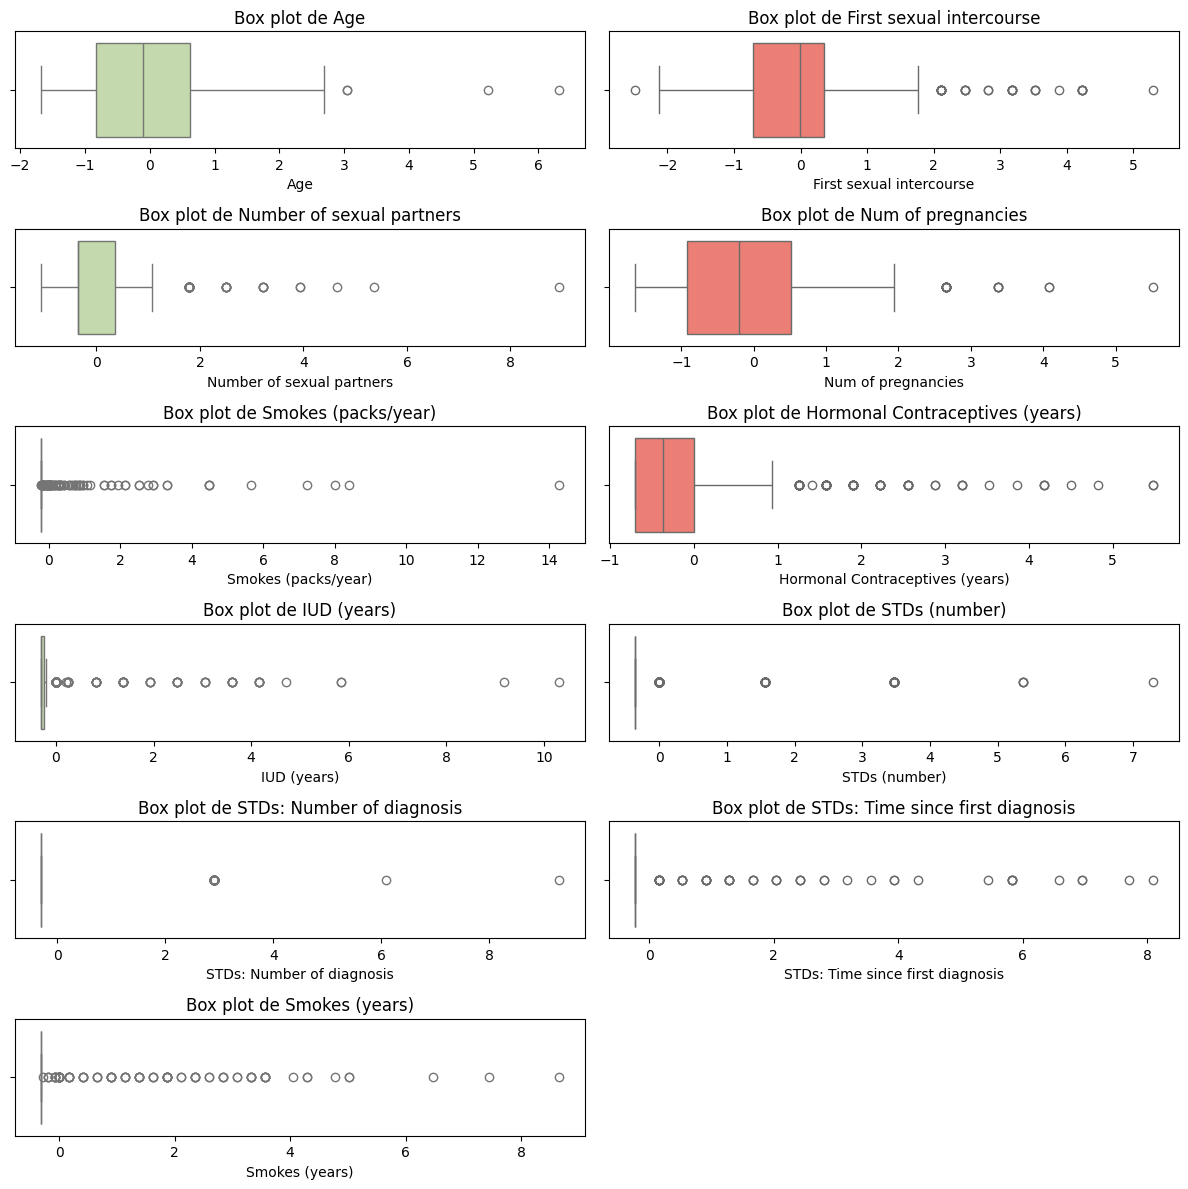

In [ ]:
#Plantando Box Plot para as variáveis numéricas após padronização de dados.

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_train[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

###Padronização dos dados do teste

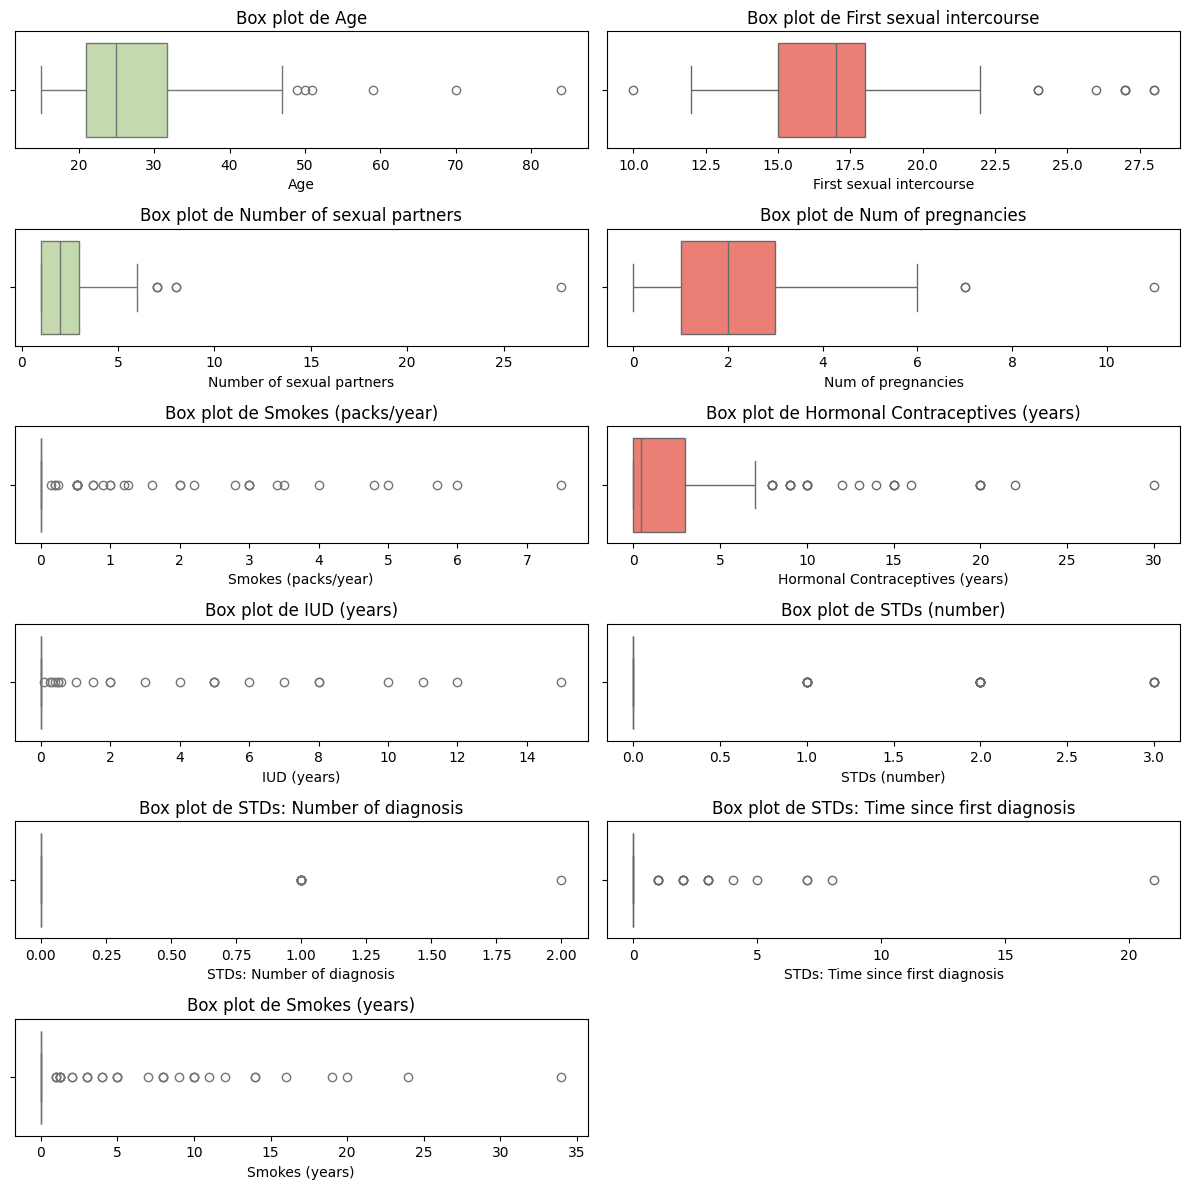

In [ ]:
#Plantando Box Plot para as variáveis numéricas

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_test[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Veriricando a correlação de Pearson (correlação linear) para as variáveis numéricas
#varia de 1 a -1
#0 é quando não há correlação nenhuma
corr = x1_test[numeric_features].corr()
corr

,Age,First sexual intercourse,Number of sexual partners,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,Smokes (years)
Age,1.000000,0.321494,0.057660,0.637535,0.071047,0.313981,0.201857,-0.050186,-0.041610,0.075769,0.306960
First sexual intercourse,0.321494,1.000000,-0.255911,0.039405,-0.085942,-0.024962,-0.059075,0.037925,0.018216,0.041677,0.006585
Number of sexual partners,0.057660,-0.255911,1.000000,0.075155,0.421433,0.012050,-0.021561,-0.030028,-0.030378,-0.017227,0.192101
Num of pregnancies,0.637535,0.039405,0.075155,1.000000,0.067128,0.248407,0.204620,-0.021299,0.023294,0.089468,0.288163
Smokes (packs/year),0.071047,-0.085942,0.421433,0.067128,1.000000,0.066896,-0.009970,0.048497,0.004691,0.035442,0.710337
Hormonal Contraceptives (years),0.313981,-0.024962,0.012050,0.248407,0.066896,1.000000,-0.032255,-0.017724,-0.036064,0.058609,-0.008304
IUD (years),0.201857,-0.059075,-0.021561,0.204620,-0.009970,-0.032255,1.000000,0.027218,0.033149,0.005276,0.071835
STDs (number),-0.050186,0.037925,-0.030028,-0.021299,0.048497,-0.017724,0.027218,1.000000,0.874687,0.517540,0.024879
STDs: Number of diagnosis,-0.041610,0.018216,-0.030378,0.023294,0.004691,-0.036064,0.033149,0.874687,1.000000,0.654277,-0.008523
STDs: Time since first diagnosis,0.075769,0.041677,-0.017227,0.089468,0.035442,0.058609,0.005276,0.517540,0.654277,1.000000,0.021868


In [ ]:
#criando uma tabela com as frequências das colunas dummy_features
for feature in dummy_features:
  tab = x1_test[feature].value_counts()
  print(tab)
  print(end='\n') #\n = símbolo de espaço

Smokes
0.0    222
1.0     35
Name: count, dtype: int64

Hormonal Contraceptives
1.0    155
0.0     82
Name: count, dtype: int64

IUD
0.0    209
1.0     24
Name: count, dtype: int64

STDs:condylomatosis
0.0    223
1.0     13
Name: count, dtype: int64

STDs:syphilis
0.0    232
1.0      4
Name: count, dtype: int64

STDs:HIV
0.0    233
1.0      3
Name: count, dtype: int64

Dx:Cancer
0    256
1      2
Name: count, dtype: int64

Dx:CIN
0    256
1      2
Name: count, dtype: int64

Dx:HPV
0    255
1      3
Name: count, dtype: int64

Dx
0    255
1      3
Name: count, dtype: int64

STDs: Várias
0.0    254
1.0      4
Name: count, dtype: int64



In [ ]:
#Imputando dados faltantes em variáveis númericas pela média

# Lista de variáveis numéricas que possuem dados faltantes (excluindo 'Age' e 'STDs: Number of diagnosis')
numeric_features_to_impute = [col for col in numeric_features if col not in ['Age', 'STDs: Number of diagnosis']]

# Imputar valores faltantes nas variáveis numéricas restantes pela média
x1_test[numeric_features_to_impute] = x1_test[numeric_features_to_impute].fillna(x1_test[numeric_features_to_impute].mean())

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a imputação de dados
x1_test[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,258.0,26.771318,9.025581,15.0,21.00,25.00,31.750000,84.0
First sexual intercourse,258.0,16.921569,2.700649,10.0,15.00,17.00,18.000000,28.0
Number of sexual partners,258.0,2.606426,2.100055,1.0,1.25,2.00,3.000000,28.0
Num of pregnancies,258.0,2.246862,1.400993,0.0,1.00,2.00,3.000000,11.0
Smokes (packs/year),258.0,0.277259,0.990781,0.0,0.00,0.00,0.000000,7.5
Hormonal Contraceptives (years),258.0,2.489883,4.375954,0.0,0.00,0.66,2.872471,30.0
IUD (years),258.0,0.464163,1.834848,0.0,0.00,0.00,0.000000,15.0
STDs (number),258.0,0.156780,0.533687,0.0,0.00,0.00,0.000000,3.0
STDs: Number of diagnosis,258.0,0.073643,0.276166,0.0,0.00,0.00,0.000000,2.0
STDs: Time since first diagnosis,258.0,0.294574,1.623768,0.0,0.00,0.00,0.000000,21.0


In [ ]:
#Imputando dados faltantes em variáveis dummy pela moda

# Variáveis dummy com dados faltantes
dummy_features_with_missing = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs:condylomatosis', 'STDs:syphilis', 'STDs:HIV']

# Imputar valores faltantes nas variáveis dummy pela moda
for feature in dummy_features_with_missing:
    mode_value = x1_test[feature].mode()[0]  # Obtém a moda (valor mais frequente)
    x1_test[feature].fillna(mode_value, inplace=True)

In [ ]:
# verificando valores ausentes para cada variável de x1_test após imputação de dados nas variáveis numéricas e dummy
x1_test.isna().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [ ]:
# Ajustar o scaler aos dados
s_scaler.fit(x1_test[numeric_features])

# Transformar os dados e substituir no dataset
x1_test[numeric_features] = s_scaler.transform(x1_test[numeric_features])

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a padronização
x1_test[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,258.0,1.617999e-16,1.001944,-1.306752,-0.640683,-0.196637,0.552691,6.353044
First sexual intercourse,258.0,-7.573614e-17,1.001944,-2.567909,-0.712904,0.029098,0.400099,4.110109
Number of sexual partners,258.0,-6.885104e-18,1.001944,-0.766431,-0.647155,-0.289328,0.187776,12.115362
Num of pregnancies,258.0,-5.852338e-17,1.001944,-1.606880,-0.891714,-0.176547,0.538619,6.259951
Smokes (packs/year),258.0,3.098297e-17,1.001944,-0.280383,-0.280383,-0.280383,-0.280383,7.304116
Hormonal Contraceptives (years),258.0,8.262125e-17,1.001944,-0.570098,-0.570098,-0.418981,0.087600,6.298875
IUD (years),258.0,5.508083e-17,1.001944,-0.253463,-0.253463,-0.253463,-0.253463,7.937493
STDs (number),258.0,2.065531e-17,1.001944,-0.294338,-0.294338,-0.294338,-0.294338,5.337862
STDs: Number of diagnosis,258.0,-2.754042e-17,1.001944,-0.267182,-0.267182,-0.267182,-0.267182,6.988917
STDs: Time since first diagnosis,258.0,-2.754042e-17,1.001944,-0.181766,-0.181766,-0.181766,-0.181766,12.776249


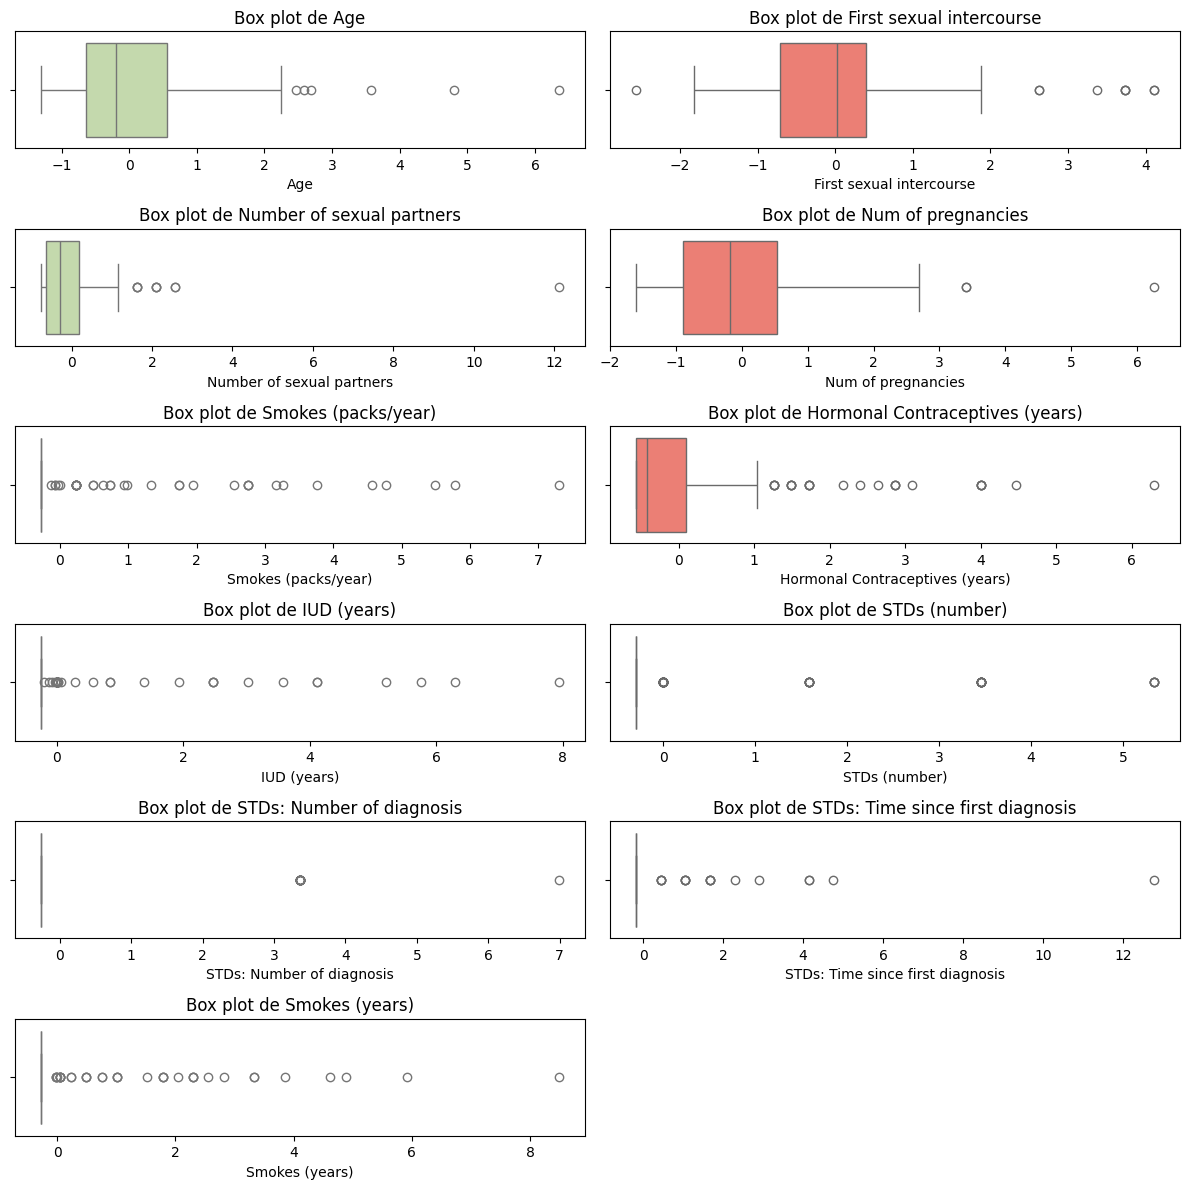

In [ ]:
#Plantando Box Plot para as variáveis numéricas após padronização de dados.

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_test[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

###Modelos de ML:

In [ ]:
# instalando a biblioteca tabpfn
!pip install tabpfn -q

# instalando a biblioteca catboost
!pip install catboost -q

# instalando a biblioteca lightgbm
!pip install lightgbm -q

# instalando a biblioteca xgboost
!pip install xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 957.8 kB/s eta 0:00:00


In [ ]:
# importando a função RandomForestClassifier da biblioteca sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# importando as funções accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# da biblioteca sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# importando a função cross_val_score da biblioteca sklearn.model_selection
from sklearn.model_selection import cross_val_score

# importando a função TabPFNClassifier da biblioteca tabpfn
from tabpfn import TabPFNClassifier

# importando a função XGBClassifier da biblioteca xgboost
from xgboost import XGBClassifier

# importando a função CatBoostClassifier da biblioteca catboost
from catboost import CatBoostClassifier

# importando a função LGBMClassifier da biblioteca lightgbm
from lightgbm import LGBMClassifier

# importando a função GridSearchCV da biblioteca sklearn.model_selection
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


###Modelo Random Forest

Não lê linhas com dados faltantes (missing)

In [ ]:
# Instancia o classificador RandomForest
rf=RandomForestClassifier()

# Treina o modelo com os dados de treinamento
rf.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
# default do número de estimadores (árvores)
rf.n_estimators

100

In [ ]:
# default do critério de divisão dos nós
rf.criterion

'gini'

In [ ]:
# default do número de variáveis usadas para cada árvores
rf.max_features

'sqrt'

###Otimização do Random Forest com GridSearchCV

Processo de ajustar os hiperparâmetros do modelo de Random Forest para encontrar a melhor combinação que maximize o desempenho preditivo. O GridSearchCV faz isso de forma sistemática, testando exaustivamente várias combinações de hiperparâmetros e avaliando cada uma com validação cruzada.

In [ ]:
# Instancia o classificador RandomForest
#repetido, pois já foi feito acima
rf=RandomForestClassifier()

In [ ]:
# Definir a grade (ou range) de hiperparâmetros para o RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [2, 3, 4, 5, 6]
}

In [ ]:
# Definir a semente aleatória
np.random.seed(42)

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

# Instancia o GridSearchCV com validação cruzada e AUC como métrica
grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', return_train_score=True)

# Treinar o modelo com GridSearchCV
grid_search.fit(x1_train, y1_train)

#mostrar o melhor desempenho de hiperparâmetro
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 50}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
rf=RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=50, random_state=42)
rf.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_rf = rf.predict(x1_test)
y_prob_rf = rf.predict_proba(x1_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
recall_rf = recall_score(y1_test, y_pred_rf)
precision_rf = precision_score(y1_test, y_pred_rf)
f1_rf = f1_score(y1_test, y_pred_rf)
auc_rf = roc_auc_score(y1_test, y_prob_rf)

print(f'Random Forest - Recall:', round(recall_rf, 3))
print(f'Random Forest - Precision:', round(precision_rf, 3))
print(f'Random Forest - F1:', round(f1_rf, 3))
print(f'Random Forest - ROC AUC:', round(auc_rf, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Recall: 0.0
Random Forest - Precision: 0.0
Random Forest - F1: 0.0
Random Forest - ROC AUC: 0.648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado indica que o limiar de 0,5 não está pegando os dados do teste devido a variável alvo ter dados desbalanceados.

In [ ]:
#visualizando o que tem no y1_test
y1_test

,Biopsy
627,0
393,0
776,0
156,0
712,0
...,...
138,0
596,0
482,0
541,0


In [ ]:
#contagem de itens separadas no teste para a variável alvo
y1_test.value_counts()

,count
Biopsy,
0,241
1,17


In [ ]:
#convertendo a a variável y1_pred_rf (que contém as previsões do modelo) em uma série do pandas
pd.Series(y1_pred_rf).value_counts()

,count
True,258


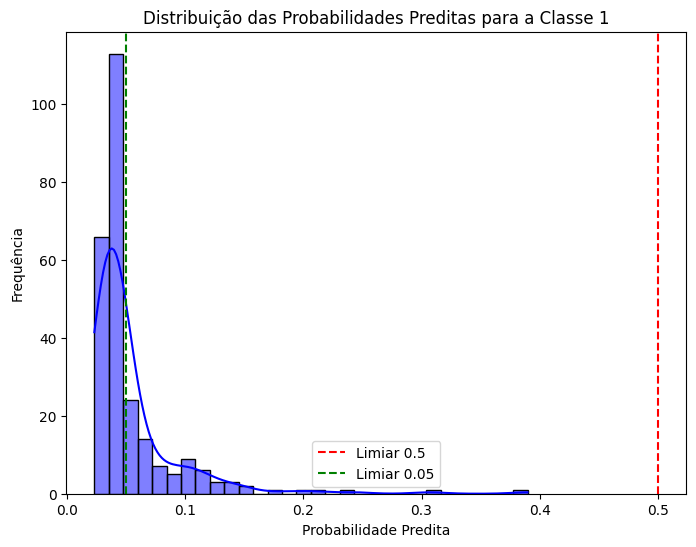

In [ ]:
# Obtendo as probabilidades preditas para a classe 1
y1_prob_rf = rf.predict_proba(x1_test)[:, 1]

# Plotando o histograma
plt.figure(figsize=(8, 6))
sns.histplot(y1_prob_rf, bins=30, kde=True, color='blue')
plt.title('Distribuição das Probabilidades Preditas para a Classe 1')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência')
plt.axvline(0.5, color='red', linestyle='--', label='Limiar 0.5')
plt.axvline(0.05, color='green', linestyle='--', label='Limiar 0.05')
plt.legend()
plt.show()

In [ ]:
#Outra opção
import plotly.express as px
px.histogram(y1_prob_rf)

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV (com os melhores hiperparâmetros)
rf=RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50, random_state=42)
rf.fit(x1_train, y1_train)

# Predizendo os valores na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_rf = rf.predict(x1_test)
y1_pred_rf = rf.predict_proba(x1_test)[:, 1] > 0.05 #melhor limiar encontrado para o modelo
y1_prob_rf = rf.predict_proba(x1_test)[:, 1]

# Calculando as métricas de desempenho
# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
recall_rf = recall_score(y1_test, y1_pred_rf)
precision_rf = precision_score(y1_test, y1_pred_rf)
f1_rf = f1_score(y1_test, y1_pred_rf)
auc_rf = roc_auc_score(y1_test, y1_prob_rf)

# Exibindo os resultados das métricas
print(f'Random Forest - Recall:', round(recall_rf, 3))
print(f'Random Forest - Precision:', round(precision_rf, 3))
print(f'Random Forest - F1:', round(f1_rf, 3))
print(f'Random Forest - ROC AUC:', round(auc_rf, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest - Recall: 0.529
Random Forest - Precision: 0.132
Random Forest - F1: 0.212
Random Forest - ROC AUC: 0.666


### XGBoost

In [ ]:
# criando o modelo
xgb=XGBClassifier()

In [ ]:
# definindo as possibilidades ou range para alguns hiperparâmetros do XGBoost
grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.05, 0.1]
}

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

grid_search = GridSearchCV(xgb, grid_xgboost, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x1_train, y1_train)
grid_search.best_params_

{'eta': 0.05, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
xgb=XGBClassifier(eta=0.05, max_depth=3, n_estimators=50, random_state=42)
xgb.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_xgb = xgb.predict(x1_test)
y1_prob_xgb = xgb.predict_proba(x1_test)[:, 1] #pedindo a probabilidade de 1

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_xgb = roc_auc_score(y1_test, y1_prob_xgb)
recall_xgb = recall_score(y1_test, y1_pred_xgb)
precision_xgb = precision_score(y1_test, y1_pred_xgb)
f1_xgb = f1_score(y1_test, y1_pred_xgb)

print(f'XGBoost - Recall:', round(recall_xgb, 3))
print(f'XGBoost - Precision:', round(precision_xgb, 3))
print(f'XGBoost - F1:', round(f1_xgb, 3))
print(f'XGBoost - ROC AUC:', auc_xgb)

XGBoost - Recall: 0.0
XGBoost - Precision: 0.0
XGBoost - F1: 0.0
XGBoost - ROC AUC: 0.7338296314376374


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
xgb=XGBClassifier(eta=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_xgb = xgb.predict(x1_test)
y1_pred_xgb = xgb.predict_proba(x1_test)[:, 1] > 0.05 #melhor limiar encontrado para o modelo
y1_prob_xgb = xgb.predict_proba(x1_test)[:, 1] #pedindo a probabilidade de 1

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_xgb = roc_auc_score(y1_test, y1_prob_xgb)
recall_xgb = recall_score(y1_test, y1_pred_xgb)
precision_xgb = precision_score(y1_test, y1_pred_xgb)
f1_xgb = f1_score(y1_test, y1_pred_xgb)

print(f'XGBoost - Recall:', round(recall_xgb, 3))
print(f'XGBoost - Precision:', round(precision_xgb, 3))
print(f'XGBoost - F1:', round(f1_xgb, 3))
print(f'XGBoost - ROC AUC:', auc_xgb)

XGBoost - Recall: 0.647
XGBoost - Precision: 0.149
XGBoost - F1: 0.242
XGBoost - ROC AUC: 0.6980717598242616


###Catboost

In [ ]:
# criando o modelo
cat = CatBoostClassifier(eval_metric='Logloss', silent = True, random_state=42)

In [ ]:
# definindo as possibilidades ou range para os hiperparâmetros do catboost
grid_cat = {"depth": [1, 2, 3],
            "iterations": [50, 100, 500],
            "learning_rate": [0.01, 0.05, 0.1]
           }

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

grid_search = GridSearchCV(cat, grid_cat, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x1_train, y1_train)
grid_search.best_params_

{'depth': 3, 'iterations': 50, 'learning_rate': 0.01}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
cat=CatBoostClassifier(eval_metric='Logloss', silent = True, depth=3, iterations=50, learning_rate=0.01, random_state=42)
cat.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_cat = cat.predict(x1_test)
y1_prob_cat = cat.predict_proba(x1_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_cat = roc_auc_score(y1_test, y1_prob_cat)
recall_cat = recall_score(y1_test, y1_pred_cat)
precision_cat = precision_score(y1_test, y1_pred_cat)
f1_cat = f1_score(y1_test, y1_pred_cat)

print(f'Catboost - Recall:', round(recall_cat, 3))
print(f'Catboost - Precision:', round(precision_cat, 3))
print(f'Catboost - F1:', round(f1_cat, 3))
print(f'Catboost - ROC AUC:', round(auc_cat, 3))

Catboost - Recall: 0.0
Catboost - Precision: 0.0
Catboost - F1: 0.0
Catboost - ROC AUC: 0.669


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
cat=CatBoostClassifier(eval_metric='Logloss', silent = True, depth=2, iterations=500, learning_rate=0.01, random_state=42)
cat.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_cat = cat.predict(x1_test)
y1_pred_cat = cat.predict_proba(x1_test)[:, 1] > 0.05 #melhor limiar encontrado para o modelo
y1_prob_cat = cat.predict_proba(x1_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_cat = roc_auc_score(y1_test, y1_prob_cat)
recall_cat = recall_score(y1_test, y1_pred_cat)
precision_cat = precision_score(y1_test, y1_pred_cat)
f1_cat = f1_score(y1_test, y1_pred_cat)

print(f'Catboost - Recall:', round(recall_cat, 3))
print(f'Catboost - Precision:', round(precision_cat, 3))
print(f'Catboost - F1:', round(f1_cat, 3))
print(f'Catboost - ROC AUC:', round(auc_cat, 3))

Catboost - Recall: 0.706
Catboost - Precision: 0.1
Catboost - F1: 0.175
Catboost - ROC AUC: 0.657


###Análise dos modelos

*   Random Florest com 0.05 de limiar para o modelo

Random Forest - Recall: 0.529

Random Forest - Precision: 0.132

Random Forest - F1: 0.212

Random Forest - ROC AUC: 0.666

*   XGBoost com 0.05 de limiar para o modelo

XGBoost - Recall: 0.647

XGBoost - Precision: 0.149

XGBoost - F1: 0.242

XGBoost - ROC AUC: 0.6980717598242616


*   Catboost com 0.05 de limiar para o modelo

Catboost - Recall: 0.706

Catboost - Precision: 0.1

Catboost - F1: 0.175

Catboost - ROC AUC: 0.657
